In [1]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck
from scipy.stats import mannwhitneyu
import h5py
import os.path
import gc
import os
import matplotlib.pyplot as plt


from umap import UMAP
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.spatial as sp, scipy.cluster.hierarchy as hc

import seaborn as sns
%matplotlib inline


INFO:numexpr.utils:Note: detected 192 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 192 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [ ]:
from umap import UMAP
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.spatial as sp, scipy.cluster.hierarchy as hc

import seaborn as sns


import anndata as ad
import scanpy as sc


#egad function

import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck

In [3]:
    species='human'
    SRP_name='aggregates'
    base_folder='/grid/gillis/data_norepl/lohia/'

In [144]:

adata_list = {}
for species in ['human', 'mouse']:
    for resolution in ['100kbp_raw']:
        for marker_name in ['brain_heart', 'brain_class', 'brain_blood']:
            try:
                f_path = f'/grid/gillis/data_norepl/lohia/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/hic_gene_gw_none_{marker_name}_by_allbins_max.h5ad'
                key = f'{species}_{marker_name}_{resolution}'
                if key not in adata_list.keys():
                        adata_list[key] = ad.read_h5ad(f_path, backed='r')
            except FileNotFoundError:
                    pass
        
        

In [303]:
df_layer_list = []

In [428]:
adata_b = ad.read_h5ad(f'/grid/gillis/data_norepl/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/max/zemke_heart.h5ad', backed='r')



In [431]:
adata_b.to_df().index.tolist()

['Adipocyte',
 'Atrial Cardiomyocyte',
 'Endothelial',
 'Fibroblast',
 'Lymphocyte',
 'Macrophage',
 'Nervous',
 'Smooth Muscle',
 'Ventricular Cardiomyocyte']

In [ ]:
'Atrial Cardiomyocyte'

In [433]:
cell_type_map = {
 'Adipocyte' : 'Adipocytes',
 'Atrial Cardiomyocyte': 'Cardiomyocytes',
 'Ventricular Cardiomyocyte':'Immature_Cardiomyocytes',
 'Endothelial_Arterial': 'Endothelial' ,
 'Fibroblast': 'Fibroblasts',
 'Smooth Muscle': 'Smooth_Muscle_Cells',
 'Lymphocyte': 'Lymphoid_Immune_Cells',
 'Macrophage': 'Myeloid_Immune_Cells',
 'Nervous': 'Neuronal_Cells',}

In [417]:
    drop_duplicates=False
    species='human'
    SRP_name='aggregates'
    resolution='100kbp_raw'
    base_folder='/grid/gillis/data_norepl/lohia/'

In [418]:
        for process_type in ['gw']:
            for layer_type, dist in zip(['inter'], [0]) :
                    #no_of_markers_list = []
                    #no_of_markers_list = [58,102,202]:
                    no_of_markers_list = [500]
                    for no_of_markers in no_of_markers_list:
                        for drop_duplicates in [True]:
                            for shuf in [False]:
                                for given_layer in ['z_scores']:
                                    for inp_norm in ['mean']:
                                    #for inp_norm in ['mean', 'counts', 'mean_scaled']:
                                        for corr_method in ['pearson']:
                                            if given_layer == 'none':
                                                l_n = f'{process_type}_{layer_type}_{dist}_{no_of_markers}_{drop_duplicates}_{shuf}_{inp_norm}'
                                            else:
                                                l_n = f'{process_type}_{layer_type}_{dist}_{given_layer}_{no_of_markers}_{drop_duplicates}_{shuf}_{inp_norm}'
                                            key = f'{species}_brain_class_{resolution}'
                                            df_layer = adata_list[key].to_df(layer=l_n).copy()
                                            df_layer_list.append(df_layer)
                                            

                                            # Access the existing DataFrame from adata.uns[l_n]
        

In [419]:
                if species == 'human':
                    max_bins = 38

                    module_path = '/grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/catlas_ccre/human/li2023/tables10_cis_modules.bed'

                    os.system(f"~/.conda/envs/hicexplorer/bin/bedtools intersect -wo -a {module_path} -b {base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/regions_bed_file.tsv > {base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/cre_modules.bed")
                    df_hba_modules = pd.read_csv(f'{base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/cre_modules.bed', sep='\t', names=['c','d', 'e', 'f', 'ccre', 'chr', 'start', 'end', 'bin_id', 'overlap'])
                else:
                    max_bins = 151
                    module_path = '/grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/catlas_ccre/mouse/Zu_nature2023/'


                    df = pd.read_csv(f'{module_path}/s10_cre_modules.txt', sep='\t')

                    import re
                    df['chrom'] = [re.split(":|-", x)[0] for x in df['cCRE']]
                    df['st'] = [re.split(":|-", x)[1] for x in df['cCRE']]
                    df['end'] = [re.split(":|-", x)[2] for x in df['cCRE']]

                    df[['chrom', 'st', 'end', 'module']].to_csv(f'{module_path}/s10_cre_modules.bed',index=False, header=False, sep='\t')
                    os.system(f"~/.conda/envs/hicexplorer/bin/bedtools intersect -wo -a {module_path}/s10_cre_modules.bed -b {base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/regions_bed_file.tsv > {base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/cre_modules.bed")
                    df_hba_modules = pd.read_csv(f'{base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/cre_modules.bed', sep='\t', names=['d', 'e', 'f', 'ccre', 'chr', 'start', 'end', 'bin_id', 'overlap'])


In [420]:
df_hba_modules['bin_id'] = ['bin_'+str(x) for x in df_hba_modules['bin_id'].tolist()]

df_hba_modules['rank'] = 1

marker_table = pd.pivot_table(df_hba_modules, columns='ccre', index='bin_id', values='rank', aggfunc='sum')
marker_table.fillna(0, inplace=True)

marker_table[marker_table != 0] = 1

df_input = df_layer.T

category_means, category_counts =  calculate_category_means_ignore_nan(df_input, marker_table)

df = pd.DataFrame(data=category_means,    # values
...              index=marker_table.columns.tolist(),    # 1st column as index
...              columns=df_input.columns.tolist()) 

df = df.T

unique_classes = list(set(class2_dict.values()))
palette = sns.color_palette('Set1', len(unique_classes))
class_color_map = dict(zip(unique_classes, palette))

# Map the class_dict to colors

row_colors = df.index.map(class2_dict).map(class_color_map)

sns.clustermap(df,col_cluster=True,row_cluster=True, z_score=1, row_colors=row_colors,yticklabels=True, figsize=(22,10))



In [358]:
df.index

Index(['M1', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18',
       'M19', 'M2', 'M20', 'M21', 'M22', 'M23', 'M24', 'M25', 'M26', 'M27',
       'M28', 'M29', 'M3', 'M30', 'M31', 'M32', 'M33', 'M34', 'M35', 'M36',
       'M37', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'],
      dtype='object')

In [340]:
def calculate_category_means_ignore_nan(gene_observation_matrix_df, gene_category_matrix_df):
    # Calculate mean for each category (axis=0) and each observation (axis=1), ignoring NaN values


    genes_intersect = gene_observation_matrix_df.index.intersection(gene_category_matrix_df.index)

    gene_observation_matrix_df =  gene_observation_matrix_df.loc[genes_intersect, :]
    gene_category_matrix_df = gene_category_matrix_df.loc[genes_intersect, :]

    gene_observation_matrix = gene_observation_matrix_df.values
    gene_category_matrix = gene_category_matrix_df.values

    category_counts = np.dot(gene_category_matrix.T, ~np.isnan(gene_observation_matrix))
    
    gene_observation_matrix_cleaned = np.nan_to_num(gene_observation_matrix, nan=0.0)
    
    category_sums = np.dot(gene_category_matrix.T, gene_observation_matrix_cleaned)
    
    # Calculate mean using only non-NaN values
    category_means = category_sums / category_counts
    
    # Replace NaN values in category_means with 0 where division by 0 occurred
    #category_means[np.isnan(category_means)] = 0.0
    
    return category_means, category_counts

In [ ]:
for dk, species, subtype in zip([hic_prior_list_human_brain, hic_prior_list_mouse_brain, hic_prior_list_human_brain, hic_prior_list_mouse_brain], ['human', 'mouse', 'human', 'mouse'], ['Gaba', 'Gaba', 'Glut', 'Glut']):
    
    dk = pd.concat(dk)

    dk['tissue'] = tissue

    dk['subclass'] = [subclass_dict[x] for x in dk['cell_type'].tolist()]
    dk = dk[dk['subclass']==subtype]
    dk['subclass'] = [subclass_dict_2[x] for x in dk['cell_type'].tolist()]

    dk = dk[dk['drop_duplicates']==False]

    dk = dk[dk['no_of_markers']==200]
    
    dk_list.append(dk)



    module_enrich_exp(dk, species)

In [311]:


df_layer = df_layer.dropna(axis=1, how='all')

df_layer = df_layer.fillna(0)

In [292]:
unique_classes = list(set(class2_dict.values()))
palette = sns.color_palette('tab10', len(unique_classes))
class_color_map = dict(zip(unique_classes, palette))

In [307]:
class_color_map = {}
class_color_map['N'] = 'Green'
class_color_map['NN'] = 'purple'

In [289]:
unique_classes = list(set(tissue_dict.values()))
palette = sns.color_palette('Set3', len(unique_classes))
class_color_map = dict(zip(['heart', 'brain'], palette))

In [282]:
        sns.set(style='white', font_scale=1.5)
        plt.rc("axes.spines", top=False, right=False)
        plt.rc('xtick', bottom=True)
        plt.rc('ytick', left=True)
        import joypy

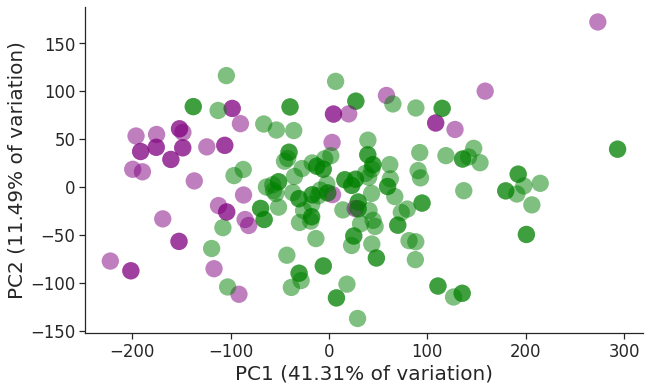

In [313]:


    plt.figure(figsize=(10, 6))
    pca = PCA(n_components=2, random_state=1)
    proj_2d = pca.fit_transform(df_layer)
    #proj_2d = pca.fit_transform(R1)
    #umap_2d = UMAP(n_components=2, init='random', random_state=10)
    #proj_2d = umap_2d.fit_transform(features_sc)

    df_proj_2d = pd.DataFrame(proj_2d, columns=['PC1', 'PC2'])

    # Access explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    
    df_proj_2d['subclass'] = [class2_dict[x] for x in df_layer.index.tolist()]
    df_proj_2d['cell_type'] = df_layer.index.tolist()
    #df_proj_2d = df_proj_2d.sort_values(by=['subclass'])



    ax = sns.scatterplot(
        x=df_proj_2d['PC1'],
        y=df_proj_2d['PC2'],
        hue=df_proj_2d['subclass'],
        s=300,
        linewidth=0, 
        palette=class_color_map,
        legend=False , alpha=0.5# Remove legend box
    )
    # Initialize list to store labeled point positions
    labeled_points = []

    # Add text labels with adjusted positions to reduce overlap
    for i, row in df_proj_2d.iterrows():
        # Define offset values based on the scale of the plot and density of points
        x_offset = 10
        y_offset = 0
        # Check if label overlaps with any existing label
        while any(abs(row[0] - x) < x_offset and abs(row[1] - y) < y_offset for x, y, _ in labeled_points):
            x_offset += 1
            y_offset += 1
        # Add label to the plot with adjusted positions
        #plt.text(row[0] + x_offset, row[1] + y_offset, str(row['cell_type']), fontsize=8, ha='center', va='center')
        # Record labeled point to avoid overlapping
        #labeled_points.append((row[0] + x_offset, row[1] + y_offset, row['cell_type']))
    #sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    
    ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% of variation)',fontsize=20)
    ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% of variation)',fontsize=20)


    # Show the plot
    #plt.show()
    plt.show()
    #plt.plot()

In [15]:
tissue_dict = {'Chandelier': "brain",
 'Lamp5': "brain",
 'Lamp5_Lhx6': "brain",
 'Pax6': "brain",
 'Pvalb': "brain",
 'Sncg': "brain",
 'Sst': "brain",
 'Chandelier': "brain",
 'Sst Chodl': "brain",
 'Meis2': "brain",
 'Vip': "brain",
 'L2/3 IT': "brain",
 'L4 IT': "brain",
 'L5 ET': "brain",
 'L5 IT': "brain",
 'L5 PT': "brain",
 'L4/5 IT': "brain",
 'L5/6 NP': "brain",
 'L6 CT': "brain",
 'L6 IT': "brain",
 'L6 IT Car3': "brain",
 'L6b': "brain",
 'Astro': 'brain',
 'Endo': 'brain',
 'Micro-PVM': 'brain',
 'OPC': 'brain',
 'Oligo': "brain",
 'VLMC':'brain', 
 'Peri': 'brain',
 'SMC': 'brain',
 'T cell': 'heart',
 'basophil': 'heart',
 'erythroblast': 'heart',
 'granulocyte': 'heart',
 'hematopoietic precursor cell': 'heart',
 'immature B cell': 'heart',
 'immature natural killer cell': 'heart',
 'late pro-B cell': 'heart',
 'macrophage': 'heart',
 'monocyte': 'heart',
 'naive B cell': 'heart',
 'pro-B cell': 'heart',
 'proerythroblast' : 'heart',
 'Adipocytes' : 'heart',
 'Cardiomyocytes': 'heart',
 'Endocardial': 'heart',
 'Endothelial_Arterial': 'heart' ,
 'Endothelial_Capillaries': 'heart',
 'Endothelial_Other': 'heart',
 'Endothelial_Venous': 'heart',
 'Fibroblasts': 'heart',
 'Pericytes_Stromal': 'heart',
 'Smooth_Muscle_Cells': 'heart',
 'Pericytes': 'heart',
 'Epicardium_FB-like': 'heart',
 'Epicardium_Meso': 'heart',
 'Epicardium_Proliferating': 'heart',
 'Immature_Cardiomyocytes': 'heart',
 'Immature_other': 'heart',
 'Lymphoid_Immune_Cells': 'heart',
 'Myeloid_Immune_Cells': 'heart',
 'Neuronal_Cells': 'heart',}

In [13]:
f'/grid/gillis/data_norepl/lohia/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/hic_gene_gw_none_{marker_name}_by_allbins_max.h5ad'

'/grid/gillis/data_norepl/lohia/hi_c_data_processing/data_human/aggregates/100kbp_raw/max/hic_gene_gw_none_brain_class_by_allbins_max.h5ad'

In [ ]:
adata_file_list[0]

In [87]:
species='human'
resolution='100kbp_raw'
key = f'{species}_brain_heart_{resolution}'
adata =adata_list[key]
snp_pos = pd.read_csv('/grid/gillis/data_norepl/lohia/human_cell_type_eqtl/snp_pos.txt.gz', sep='\t')


snp_pos['chr'] = [x.split(':')[0] for x in snp_pos['SNP_id_hg38']]

snp_pos['bin_st'] = [x.split(':')[1] for x in snp_pos['SNP_id_hg38']]

snp_pos['bin_end'] = snp_pos['bin_st']

snp_pos[['chr', 'bin_st', 'bin_end', 'SNP']].to_csv('/grid/gillis/data_norepl/lohia/human_cell_type_eqtl/snp_pos.bed', sep='\t', header=False, index=False)


os.system(f"~/.conda/envs/hicexplorer/bin/bedtools intersect -wo -b /grid/gillis/data_norepl/lohia/human_cell_type_eqtl/snp_pos.bed -a {base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/regions_bed_file.tsv > {base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/all_bin_snp_position.bed")
snp_pos = pd.read_csv(f'{base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/all_bin_snp_position.bed', sep='\t', names=['d', 'd1', 'd2', 'bin_id', 'c', 'c1', 'c2', 'SNP', 'c4'] )


In [88]:
snp_pos  = snp_pos.drop_duplicates(['SNP'])

<ipython-input-139-9c6e59fd6e4f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['subclass'] = [class2_dict[x] for x in features.index.tolist()]


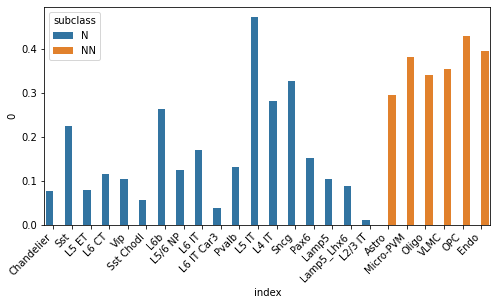

<ipython-input-139-9c6e59fd6e4f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['subclass'] = [class2_dict[x] for x in features.index.tolist()]


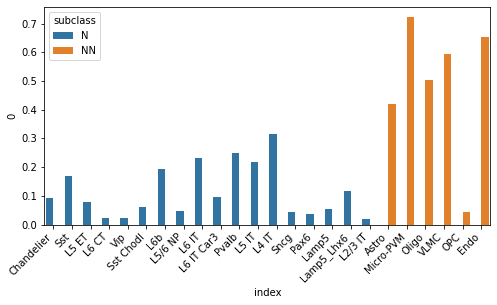

<ipython-input-139-9c6e59fd6e4f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['subclass'] = [class2_dict[x] for x in features.index.tolist()]


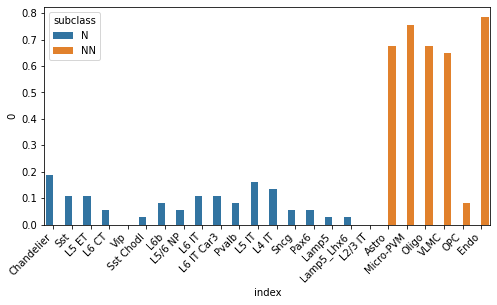

<ipython-input-139-9c6e59fd6e4f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['subclass'] = [class2_dict[x] for x in features.index.tolist()]


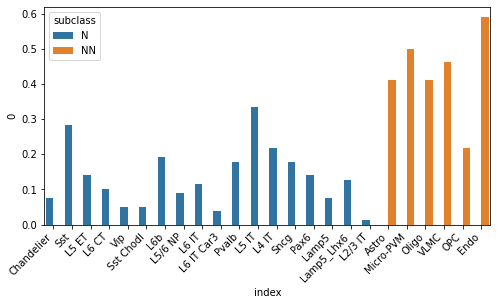

In [139]:
feature_list = []
for dfile, dis_name in zip(['Table S5 - SCZ-Table 1.tsv', 'Table S5 - MS-Table 1.tsv', 'Table S5 - AD-Table 1.tsv', 'Table S5 - PD-Table 1.tsv'], ['SCZ', 'MS', 'AD', 'PD']):
    
    

        df_all_eqtl = pd.read_csv(f'/grid/gillis/data_norepl/lohia/human_cell_type_eqtl/cis-eQTLs_results.tsv/{dfile}', sep='\t', skiprows=3)
        df_all_eqtl = df_all_eqtl.drop_duplicates(['GWAS_snp'])
        df_all_eqtl = df_all_eqtl.merge(snp_pos[['bin_id', 'SNP']], left_on='GWAS_snp', right_on='SNP')
        df_all_eqtl['bin_id'] = [f"bin_{i}" for i in df_all_eqtl['bin_id'].tolist()]

        bins_eqtl = df_all_eqtl['bin_id'].tolist()
        
        dk = adata.to_df(layer='gw_inter_0_z_scores_500_False_False_mean')
        my_val=0.8

        bins_eqtl = list(set(bins_eqtl))
        
        

        features = dk[bins_eqtl]

        features['subclass'] = [class2_dict[x] for x in features.index.tolist()]

        features = features[features['subclass'] != 'heart']

        features = features.drop(columns=['subclass'])

        z_scores = stats.zscore(features, axis=0, nan_policy='omit')

        
        #features = features[features>2]

        features=features.fillna(0)

        #fr = bottleneck.nanrankdata(features, axis=0)
        
        fr = stats.rankdata(features, axis=0, method='ordinal')

        fr = fr/bottleneck.nanmax(fr, axis=0)

        features = pd.DataFrame(data=fr,
                          index=features.index,
                          columns=features.columns)



        features = features.dropna(axis=1, how='all')

        features = features[features>my_val]

        features=features.fillna(0)

        features = features[features<=my_val]

        features=features.fillna(1)

        features = features.sum(axis=1)/features.count(axis=1)


        features= features.reset_index()

        features['subclass'] = [class2_dict[x] for x in features['index'].tolist()]

        features = features.sort_values(by=['subclass'])
                           
        features['disease'] = dis_name
        
        feature_list.append(features)
        
        plt.figure(figsize=(8, 4))
        ax=sns.barplot(data=features, y=features[0], x=features['index'], hue='subclass')

        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Adjust rotation angle as needed
        
        plt.show()


        


        

In [140]:
df = pd.concat(feature_list)

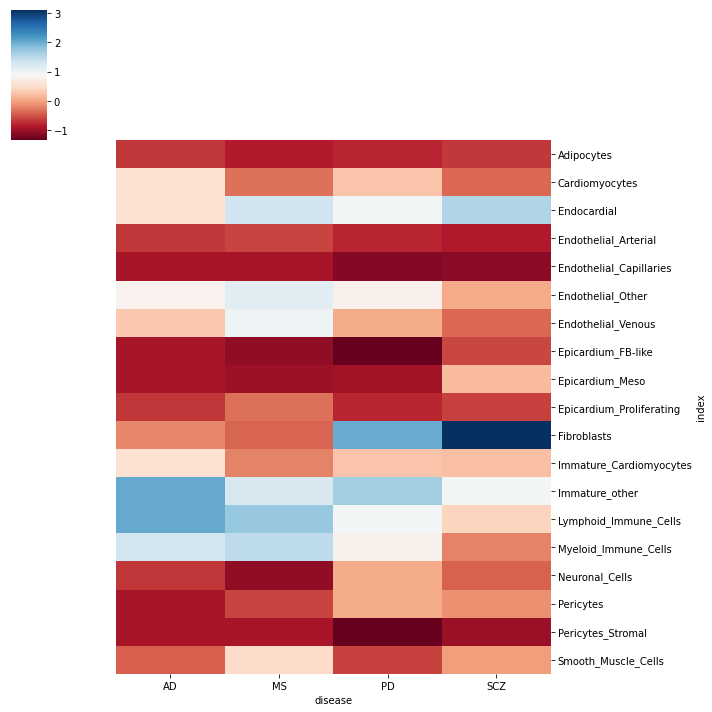

In [110]:
sns.clustermap(pd.pivot_table(data=df, index='index', columns='disease', values=0), row_cluster=False, col_cluster=False, z_score=1,  cmap='RdBu')





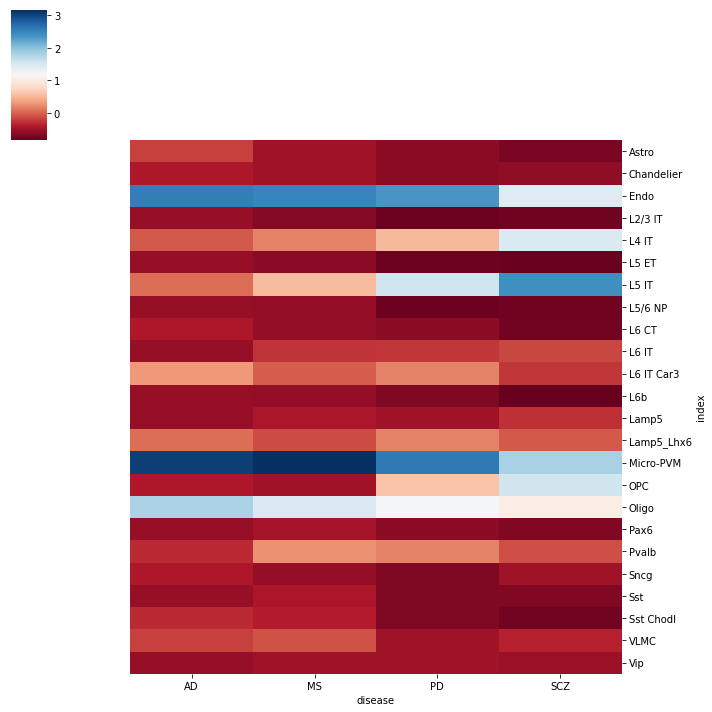

In [113]:
sns.clustermap(pd.pivot_table(data=df, index='index', columns='disease', values=0), row_cluster=False, col_cluster=False, z_score=1,  cmap='RdBu')



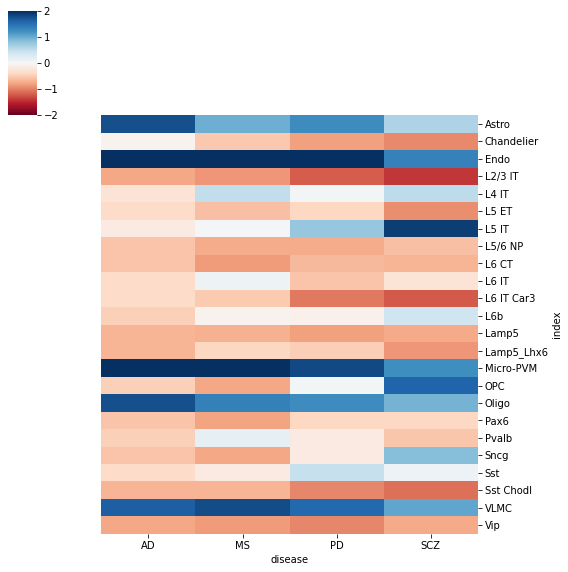

In [143]:
sns.clustermap(pd.pivot_table(data=df, index='index', columns='disease', values=0), row_cluster=False, col_cluster=False, z_score=1,  cmap='RdBu', vmin=-2, vmax=2, figsize=(8,8))



##### 

[Text(0, 0, 'Chandelier'),
 Text(1, 0, 'Sst'),
 Text(2, 0, 'L5 ET'),
 Text(3, 0, 'L6 CT'),
 Text(4, 0, 'Vip'),
 Text(5, 0, 'Sst Chodl'),
 Text(6, 0, 'L6b'),
 Text(7, 0, 'L5/6 NP'),
 Text(8, 0, 'L6 IT'),
 Text(9, 0, 'L6 IT Car3'),
 Text(10, 0, 'Pvalb'),
 Text(11, 0, 'L5 IT'),
 Text(12, 0, 'L4 IT'),
 Text(13, 0, 'Sncg'),
 Text(14, 0, 'Pax6'),
 Text(15, 0, 'Lamp5'),
 Text(16, 0, 'Lamp5_Lhx6'),
 Text(17, 0, 'L2/3 IT'),
 Text(18, 0, 'Astro'),
 Text(19, 0, 'Micro-PVM'),
 Text(20, 0, 'Oligo'),
 Text(21, 0, 'VLMC'),
 Text(22, 0, 'OPC'),
 Text(23, 0, 'Endo')]

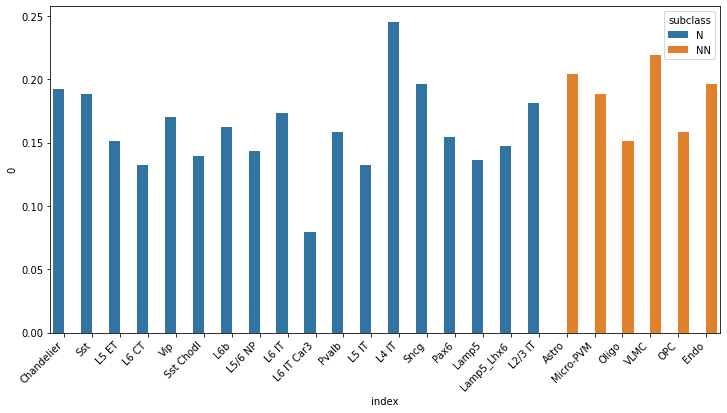

In [58]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=features, y=features[0], x=features['index'], hue='subclass')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Adjust rotation angle as needed


[Text(0, 0, 'Chandelier'),
 Text(1, 0, 'Sst'),
 Text(2, 0, 'L5 ET'),
 Text(3, 0, 'L6 CT'),
 Text(4, 0, 'Vip'),
 Text(5, 0, 'Sst Chodl'),
 Text(6, 0, 'L6b'),
 Text(7, 0, 'L5/6 NP'),
 Text(8, 0, 'L6 IT'),
 Text(9, 0, 'L6 IT Car3'),
 Text(10, 0, 'Pvalb'),
 Text(11, 0, 'L5 IT'),
 Text(12, 0, 'L4 IT'),
 Text(13, 0, 'Sncg'),
 Text(14, 0, 'Pax6'),
 Text(15, 0, 'Lamp5'),
 Text(16, 0, 'Lamp5_Lhx6'),
 Text(17, 0, 'L2/3 IT'),
 Text(18, 0, 'Astro'),
 Text(19, 0, 'Micro-PVM'),
 Text(20, 0, 'Oligo'),
 Text(21, 0, 'VLMC'),
 Text(22, 0, 'OPC'),
 Text(23, 0, 'Endo')]

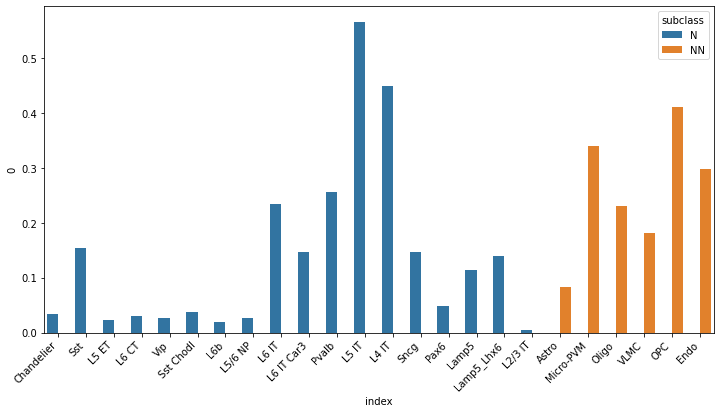

In [55]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=features, y=features[0], x=features['index'], hue='subclass')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Adjust rotation angle as needed


In [14]:
class2_dict = {'Chandelier': "N",
 'Lamp5': "N",
 'Lamp5_Lhx6': "N",
 'Pax6': "N",
 'Pvalb': "N",
 'Sncg': "N",
 'Sst': "N",
 'Chandelier': "N",
 'Sst Chodl': "N",
 'Meis2': "N",
 'Vip': "N",
 'L2/3 IT': "N",
 'L4 IT': "N",
 'L5 ET': "N",
 'L5 IT': "N",
 'L5 PT': "N",
 'L4/5 IT': "N",
 'L5/6 NP': "N",
 'L6 CT': "N",
 'L6 IT': "N",
 'L6 IT Car3': "N",
 'L6b': "N",
 'Astro': 'NN',
 'Endo': 'NN',
 'Micro-PVM': 'NN',
 'OPC': 'NN',
 'Oligo': "NN",
 'VLMC':'NN', 
 'Peri': 'NN',
 'SMC': 'NN',
 'T cell': 'heart',
 'basophil': 'heart',
 'erythroblast': 'heart',
 'granulocyte': 'heart',
 'hematopoietic precursor cell': 'heart',
 'immature B cell': 'heart',
 'immature natural killer cell': 'heart',
 'late pro-B cell': 'heart',
 'macrophage': 'heart',
 'monocyte': 'heart',
 'naive B cell': 'heart',
 'pro-B cell': 'heart',
 'proerythroblast' : 'heart',
 'Adipocytes' : 'heart',
 'Cardiomyocytes': 'heart',
 'Endocardial': 'heart',
 'Endothelial_Arterial': 'heart' ,
 'Endothelial_Capillaries': 'heart',
 'Endothelial_Other': 'heart',
 'Endothelial_Venous': 'heart',
 'Fibroblasts': 'heart',
 'Pericytes_Stromal': 'heart',
 'Smooth_Muscle_Cells': 'heart',
 'Pericytes': 'heart',
 'Epicardium_FB-like': 'heart',
 'Epicardium_Meso': 'heart',
 'Epicardium_Proliferating': 'heart',
 'Immature_Cardiomyocytes': 'heart',
 'Immature_other': 'heart',
 'Lymphoid_Immune_Cells': 'heart',
 'Myeloid_Immune_Cells': 'heart',
 'Neuronal_Cells': 'heart',}

